## Chi - squared Test of Independence between
#### 1) Income (categorized as <=5 lakhs & >5lakhs) and
#### 2) Mode of Transport(By Road, Train or Flight)

#### Null Hypothesis : There is no association between the two variables.
#### Alternative Hypothesis : There is an association between the two variables.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", index_col=None).iloc[:, 1:]
df

,gender,program,freq,cost,time,income,state,mode<10,mode>10,dist
0,male,ug,3-4,5500.0,6.0,>5,Rajasthan,flight,flight,1350
1,male,pg,3-4,3000.0,30.0,<5,Rajasthan,train,train,1350
2,male,ug,<2,2000.0,30.0,>5,Rajasthan,train,train,1350
3,male,ug,<2,5000.0,24.0,<5,Rajasthan,flight,train,1350
4,male,ug,<2,2500.0,40.0,>5,Rajasthan,flight,train,1350
...,...,...,...,...,...,...,...,...,...,...
237,male,ug,<2,6000.0,24.0,>5,Jammu & Kashmir,flight,train,2100
238,male,ug,<2,8000.0,12.0,>5,Jammu & Kashmir,flight,flight,2100
239,male,ug,>10,8000.0,48.0,<5,Bihar,road,flight,1400
240,male,pg,<2,2000.0,15.0,>5,Chhattisgarh,train,train,680


In [3]:
df2 = df[['income','mode<10']]
df2

,income,mode<10
0,>5,flight
1,<5,train
2,>5,train
3,<5,flight
4,>5,flight
...,...,...
237,>5,flight
238,>5,flight
239,<5,road
240,>5,train


### Creating Table of Observed Frequencies

In [4]:
observed_table = {
    'by_Road': [0, 0],
    'Train': [0, 0],
    'Flight': [0, 0]
}

row_names = ['<= 5 lakhs', '> 5 lakhs']

obv_df = pd.DataFrame(observed_table, index=row_names)
obv_df

,by_Road,Train,Flight
<= 5 lakhs,0,0,0
> 5 lakhs,0,0,0


In [5]:
obv_df.at['<= 5 lakhs','by_Road'] = len(df2[(df2.income == '<5') & (df2['mode<10'] == 'road')])

obv_df.at['<= 5 lakhs','Train'] = len(df2[(df2.income == '<5') & (df2['mode<10'] == 'train')])

obv_df.at['<= 5 lakhs','Flight'] = len(df2[(df2.income == '<5') & (df2['mode<10'] == 'flight')])

obv_df.at['> 5 lakhs','by_Road'] = len(df2[(df2.income == '>5') & (df2['mode<10'] == 'road')])

obv_df.at['> 5 lakhs','Train'] = len(df2[(df2.income == '>5') & (df2['mode<10'] == 'train')])

obv_df.at['> 5 lakhs','Flight'] = len(df2[(df2.income == '>5') & (df2['mode<10'] == 'flight')])

obv_df

,by_Road,Train,Flight
<= 5 lakhs,28,35,16
> 5 lakhs,66,40,57


In [6]:
obv_df['Row_total'] = obv_df.sum(axis=1)
obv_df.loc['Column_total'] = obv_df.sum(axis=0)
obv_df

,by_Road,Train,Flight,Row_total
<= 5 lakhs,28,35,16,79
> 5 lakhs,66,40,57,163
Column_total,94,75,73,242


### Creating Stacked Bar Graph for Observation Table

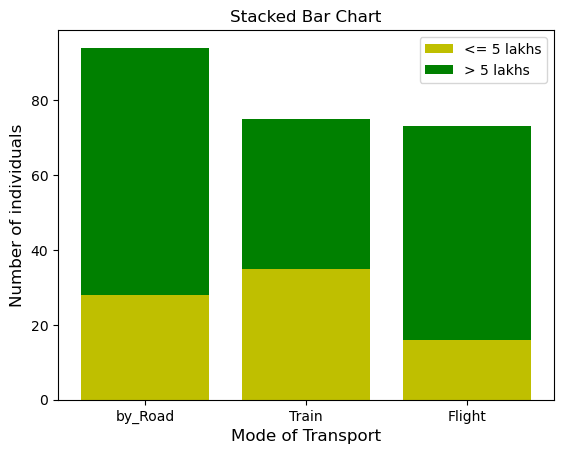

In [7]:
categories = ['by_Road', 'Train', 'Flight']
y = []
for i in range(2):
    y1 = []
    for j in range(3):
        y1.append(obv_df.iloc[i,j])
    y.append(y1)

plt.bar(categories, y[0], color='y')
plt.bar(categories, y[1], bottom=y[0], color='g')

plt.xlabel('Mode of Transport', fontsize = 12)
plt.ylabel('Number of individuals', fontsize = 12)
plt.title('Stacked Bar Chart')
plt.legend(["<= 5 lakhs", "> 5 lakhs"])
plt.show()

### Calculating Expected Frequencies:
### Each frequency is calculated as $\frac{\, Row \,Total \, x \, Column \,Total\, }{ \,Grand\, Total\, }$

In [8]:
exp_df = obv_df.copy()

for i in range(2):
    for j in range(3):
        exp_df.iloc[i,j] = (obv_df.iloc[i,3]*obv_df.iloc[2,j])/obv_df.iloc[2,3]
exp_df

,by_Road,Train,Flight,Row_total
<= 5 lakhs,30.68595,24.483471,23.830579,79
> 5 lakhs,63.31405,50.516529,49.169421,163
Column_total,94.00000,75.000000,73.000000,242


### Calculating test statistic as:

$$ \chi^{2*} = \sum_{i=1}^{rc} \frac{(O_{i} - E_{i})^2}{E_{i}} $$
$$ \chi^{2*} \sim \chi^{2}_{(r-1)(c-1)}$$

In [9]:
test_stat = 0
for i in range(2):
    for j in range(3):
        test_stat += (obv_df.iloc[i,j] - exp_df.iloc[i,j])**2/exp_df.iloc[i,j]
test_stat

10.875758132489585

### Calculating p-value:
$$ p\text{-value} = P(\chi^{2} > \chi^{2*}) $$

In [10]:
p_value = 1 - chi2.cdf(test_stat, 2)
p_value

0.004348696794470919

#### Since p-value is less than 0.05 (level of significance), we reject the Null Hypothesis.

#### Hence, our alternative hypothesis is correct and their is an association between Income and Mode of Transport.